In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
ages_df = pd.read_csv("AGEs.csv")
arm_df = pd.read_csv("original_raman_spectroscopy/innerArm.csv")
thumbnail_df = pd.read_csv("original_raman_spectroscopy/thumbNail.csv")
earlobe_df = pd.read_csv("original_raman_spectroscopy/earLobe.csv")
vein_df = pd.read_csv("original_raman_spectroscopy/vein.csv")

In [3]:
ages_df

,AGEsID,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,Var810,...,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799,Var1800,Var1801,Var1802
0,ramanShift,800.000000,801.000000,802.000000,803.000000,804.000000,805.000000,806.000000,807.000000,808.000000,...,1791.000000,1792.000000,1793.000000,1794.000000,1795.000000,1796.000000,1797.000000,1798.000000,1799.000000,1800.000000
1,3-deoxyglucosone,0.001791,0.001813,0.001839,0.001868,0.001899,0.001929,0.001956,0.001980,0.002002,...,0.000492,0.000492,0.000495,0.000502,0.000509,0.000516,0.000524,0.000534,0.000543,0.000553
2,glyoxal,0.000220,0.000243,0.000270,0.000299,0.000331,0.000367,0.000405,0.000445,0.000488,...,0.000213,0.000217,0.000222,0.000227,0.000233,0.000240,0.000247,0.000253,0.000256,0.000256
3,GOLD,0.000302,0.000295,0.000288,0.000281,0.000275,0.000268,0.000262,0.000256,0.000251,...,0.000141,0.000142,0.000142,0.000129,0.000128,0.000128,0.000127,0.000127,0.000126,0.000126
4,methylglyoxal,0.003002,0.003058,0.003095,0.003115,0.003121,0.003115,0.003098,0.003072,0.003038,...,-0.000115,-0.000130,-0.000146,-0.000161,-0.000176,-0.000190,-0.000205,-0.000219,-0.000223,-0.000224
5,MG-H2,0.000236,0.000231,0.000226,0.000221,0.000215,0.000208,0.000202,0.000195,0.000187,...,0.000034,0.000049,0.000065,0.000082,0.000101,0.000122,0.000144,0.000168,0.000194,0.000192
6,pentosidine,0.000803,0.000748,0.000693,0.000637,0.000582,0.000527,0.000475,0.000424,0.000377,...,0.000069,0.000067,0.000065,0.000063,0.000060,0.000092,0.000092,0.000092,0.000092,0.000092


In [4]:
patient_1_earlobe = earlobe_df[1:2]

In [5]:
patient_1_earlobe_numpy = patient_1_earlobe.drop(labels='patientID', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').to_numpy().flatten()

In [6]:
patient_1_earlobe.iloc[800:1800]

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161


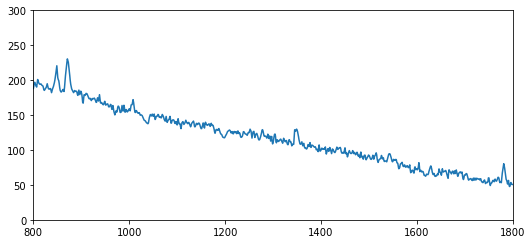

In [7]:
plt.plot(patient_1_earlobe_numpy)
plt.ylim([0, 300])
plt.xlim([800, 1800])
plt.savefig('plot1.png')
plt.show()

In [8]:
polynomial_degree=5 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(patient_1_earlobe_numpy)

Modpoly_output=baseObj.ModPoly(polynomial_degree, gradient=0.05)

Imodpoly_output=baseObj.IModPoly(polynomial_degree, gradient=0.05)

Zhangfit_output=baseObj.ZhangFit()

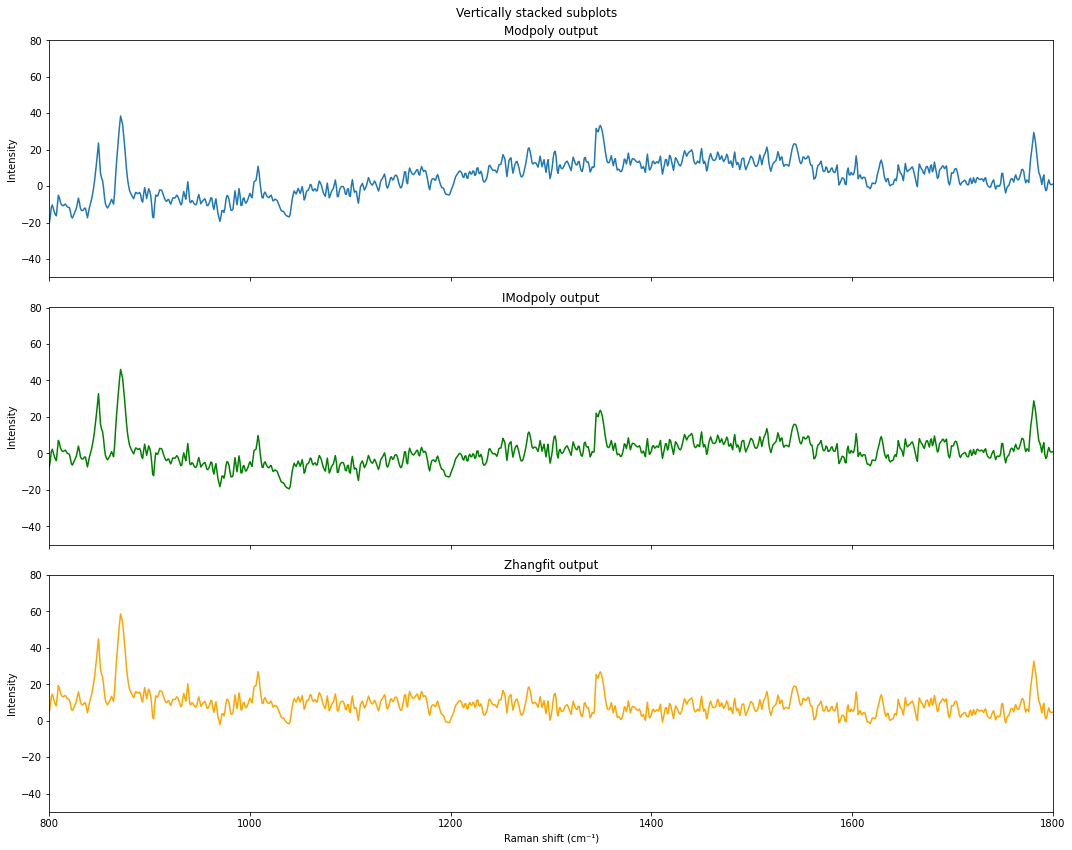

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15,12))
plt.suptitle('Vertically stacked subplots')
ax1.plot(Modpoly_output)
ax1.set_xlim([800, 1800])
ax1.set_ylim([-50, 80])
ax1.set_title('Modpoly output')
ax1.set_ylabel('Intensity')


ax2.plot(Imodpoly_output, color='green')
ax2.set_xlim([800, 1800])
ax2.set_ylim([-50, 80])
ax2.set_title('IModpoly output')
ax2.set_ylabel('Intensity')


ax3.plot(Zhangfit_output, color='orange')
ax3.set_xlim([800, 1800])
ax3.set_ylim([-50, 80])
ax3.set_title('Zhangfit output')
ax3.set_ylabel('Intensity')

plt.xlabel('Raman shift (cm⁻¹)')


plt.savefig('plot2_1.pdf')
plt.show()

In [38]:
p1_crop = patient_1_earlobe_numpy[800:1800]
print(p1_crop)

[187.8871521  191.1858643  195.9431122  197.0198853  194.7745636
 192.7436157  191.2158875  190.1949341  195.590097   200.98526
 199.5084259  196.8092407  195.2927215  194.4824768  194.1457581
 194.506073   194.6173126  193.6258515  192.6343842  192.1647095
 191.7137695  189.305957   186.237793   185.375769   186.4592896
 187.5430206  188.6271912  189.8599793  192.3912079  194.9224365
 192.2201782  188.8733643  187.5540741  187.192041   187.3401855
 188.064685   187.8191803  184.8288528  182.14198    184.7714005
 187.4008179  189.3390045  191.153476   193.7282562  196.7239014
 200.4405212  205.0729156  209.9445068  215.5793793  220.6749542
 212.1266846  203.5784119  200.9025513  199.3556671  195.1244934
 189.3885223  185.5121887  183.9634674  182.9814026  183.7106445
 184.464859   185.6505829  186.8363037  185.5053848  183.771373
 189.2615387  198.302005   206.2039215  212.8740784  219.3588532
 225.3929871  230.5432953  228.0733215  225.6033447  219.6880554
 213.463681   206.565509   1

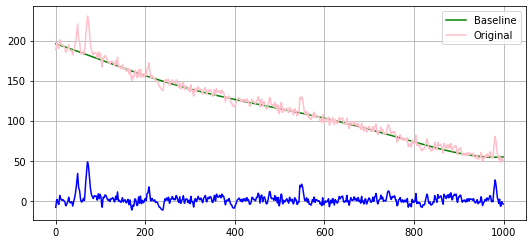

In [68]:
from pybaselines.polynomial import imodpoly

baseline = imodpoly(p1_crop, poly_order=5, tol=0.05, max_iter=1000)
original = p1_crop - baseline[0]

plt.grid()
plt.plot(baseline[0], color='green')
plt.plot(p1_crop, color='pink')
plt.plot(original, color='blue')
plt.legend(['Baseline', 'Original'])

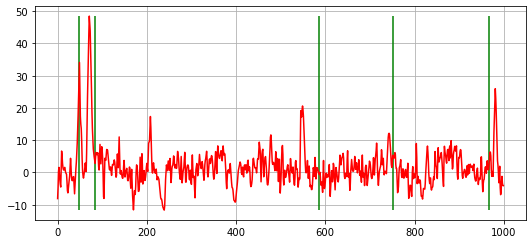

In [63]:
plt.grid()
plt.vlines(48, ymax=max(original), ymin=min(original), color='green')
plt.vlines(83, ymax=max(original), ymin=min(original), color='green')
plt.vlines(585, ymax=max(original), ymin=min(original), color='green')
plt.vlines(752, ymax=max(original), ymin=min(original), color='green')
plt.vlines(968, ymax=max(original), ymin=min(original), color='green')
plt.plot(original, color='red')
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(original.reshape(-1, 1))

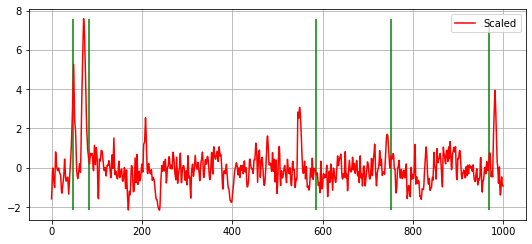

In [69]:
plt.grid()
plt.vlines(48, ymax=max(scaled), ymin=min(scaled), color='green')
plt.vlines(83, ymax=max(scaled), ymin=min(scaled), color='green')
plt.vlines(585, ymax=max(scaled), ymin=min(scaled), color='green')
plt.vlines(752, ymax=max(scaled), ymin=min(scaled), color='green')
plt.vlines(968, ymax=max(scaled), ymin=min(scaled), color='green')
plt.plot(scaled, color='red', label='Scaled')
plt.legend()
plt.show()